# Análise e exploração de dados

Este ficheiro é para me "ambientar" com o que é pedido.
O "trabalho" oficial está no reposítório **git** da equipa: 
https://bitbucket.org/anadi-rita/anadi/src/main/

~~~bash
git clone git@bitbucket.org:anadi-rita/anadi.git
~~~

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import utilidades as ut

## Variáveis

In [2]:
proj_root_dir = Path(".").resolve().parent.parent
data_files_dir = "/ficheiros/Trabalho 1/"
ficheiro_dados_co = f"{proj_root_dir}{data_files_dir}CO_data.csv"
ficheiro_dicio_dados_co = f"{proj_root_dir}{data_files_dir}CO_data_dicionario.xlsx"

colunas_em_estudo = ["country", "year", "population", "co2"]

# Preparar uma lista de cores
cores = list(mcolors.BASE_COLORS.keys())


## Carregar os dados

In [3]:
dados_co = pd.read_csv(
    ficheiro_dados_co,
    delimiter=",",
    header=0,
)

### Espreitar os dados

In [4]:
dados_co.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Carregar o dicionário

In [5]:
dicionario_dados = pd.read_excel(ficheiro_dicio_dados_co)

## Análise e exploração de dados

Ponto 4.1 do trabalho

### Ponto 3
Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 per capita
de Portugal com a Espanha. 

#### Extrair os dados de Portugal e Espanha

Podemos fazer a seleção num único passo: 

In [6]:
dados_co_pt_es_plt = dados_co.loc[dados_co.country.isin(["Portugal", "Spain"]), colunas_em_estudo]

Executar a linha abaixo, substitui os valores NaN por 0.
Tem efeitos no resultado final, dependendo do tipo de gráfico ou cálculos que se realizem.

In [7]:
dados_co_pt_es_plt.fillna(0, inplace=True)  # Preencher os valores NaN com 0.

In [8]:
dados_co_pt_es_plt.head()

,country,year,population,co2
24456,Portugal,1900,5402551.0,2.466
24457,Portugal,1901,5445806.0,2.389
24458,Portugal,1902,5490822.0,2.620
24459,Portugal,1903,5537624.0,2.521
24460,Portugal,1904,5584825.0,2.579


In [9]:
dados_co_pt_es_plt['co2_per_capita']=dados_co_pt_es_plt['co2'] * 1E6 / dados_co_pt_es_plt['population']

In [10]:
dados_co_pt_es_plt.head()

,country,year,population,co2,co2_per_capita
24456,Portugal,1900,5402551.0,2.466,0.456451
24457,Portugal,1901,5445806.0,2.389,0.438686
24458,Portugal,1902,5490822.0,2.620,0.477160
24459,Portugal,1903,5537624.0,2.521,0.455249
24460,Portugal,1904,5584825.0,2.579,0.461787


In [11]:
# Preparar os dados

In [12]:
datas = dados_co_pt_es_plt.loc[dados_co_pt_es_plt.country == "Portugal", "year"].values
dados_pt = dados_co_pt_es_plt.loc[dados_co_pt_es_plt.country == "Portugal", "co2_per_capita"]
dados_es = dados_co_pt_es_plt.loc[dados_co_pt_es_plt.country == "Spain", "co2_per_capita"]


### Stack

Este gráfico pode ser interessante, é feito o "stack" dos valores, mas o resultado é "balanceado" à volta do 0.
Seria necessário trabalhar os eixos.

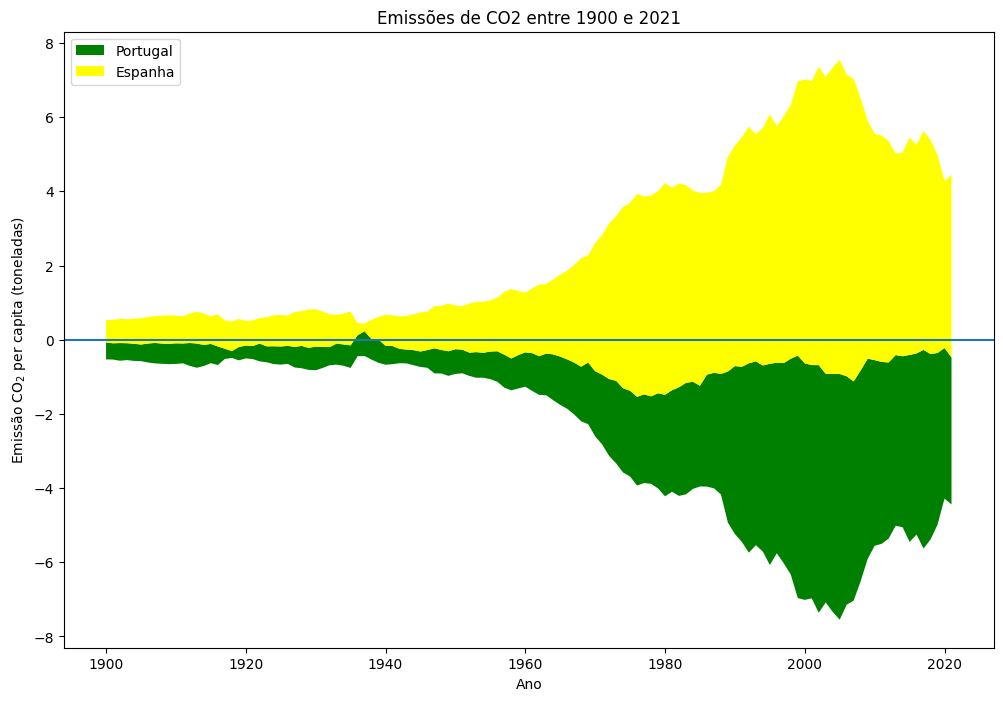

In [13]:
stack_fig, stack_ax = plt.subplots(figsize=(12, 8))
# Configuraçao do ``Axes``.
stack_ax.set_title("Emissões de CO2 per capita entre 1900 e 2021")
stack_ax.set_xlabel("Ano")
stack_ax.set_ylabel(r"Emissão CO$_2$ per capita (toneladas)")
# stack_ax.grid(visible=True)
stack_ax.axhline(0)

stack_ax.stackplot(
    datas,  # Valores a utilizar no eixo dos XX
    [dados_pt, dados_es],  # Valores das áreas indexadas pelo ano.
    baseline="sym",
    labels=["Portugal", "Espanha"],  # O valor "humano" das etiquetas.
    colors=["green", "yellow"],  # Cores das áreas.
)
stack_ax.legend(loc="upper left")


### Plot

Apesar de simples, este é a meu ver o que mais facilmente permite ver a diferença entre os países. E assim responder mais adequadamente ao que se pede. Decididamente uma abordagem KISS (1).

(1) **K**eep **I**t **S**tupidly **S**imple - Esta versão é menos "ofensiva" 

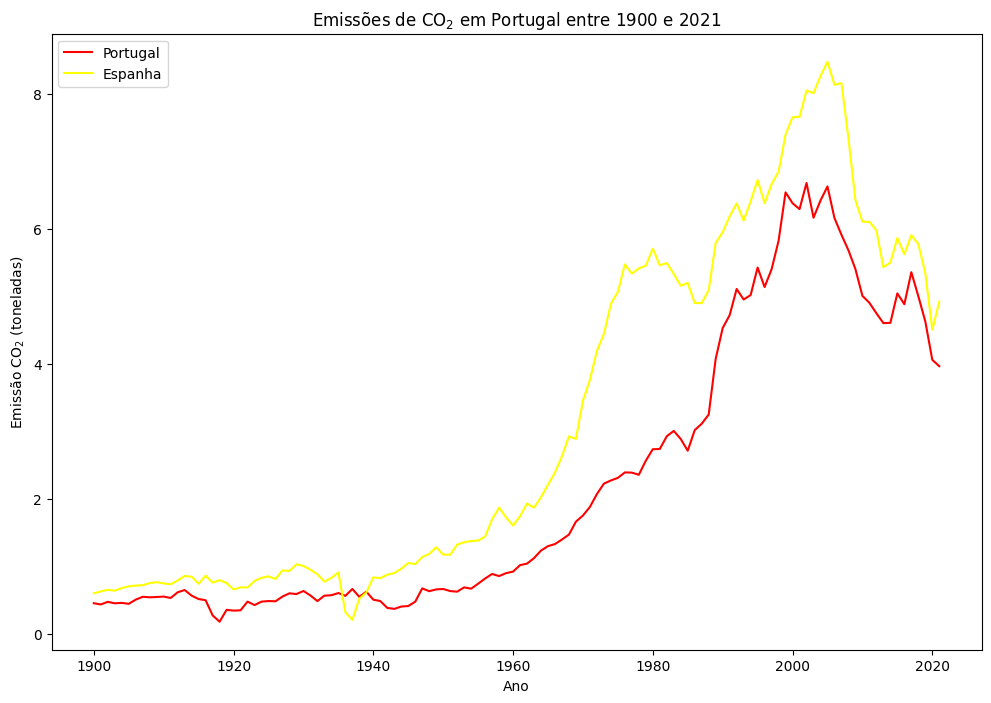

In [16]:
plot_fig, plot_ax = plt.subplots(figsize=(12, 8))
# Configuraçao do ``Axes``.
plot_ax.set_title(r"Emissões de CO$_2$ per capita entre 1900 e 2021")
plot_ax.set_xlabel("Ano")
plot_ax.set_ylabel(r"Emissão CO$_2$ per capita (toneladas)")

graficos = []
dados_para_grafico = [
    [dados_pt, "red", "Portugal"],
    [dados_es, "yellow", "Espanha"],
]

# Construir as várias "linhas"
for dados_pais in dados_para_grafico:
    grafico = plot_ax.plot(
        datas,  # Seria a utilizar para o eixo dos XX.
        dados_pais[0],  # Seria a utilizar para o eixo dos YY. 
        color=dados_pais[1],  # Cor da "linha".
        label=dados_pais[2],  # O valor "humano" das etiquetas. 
    )
    # Vou guardar as linhas numa lista caso queira mais tarde referênciar as mesmas.
    graficos.append(grafico)

plot_ax.legend(loc="upper left")

### Barras


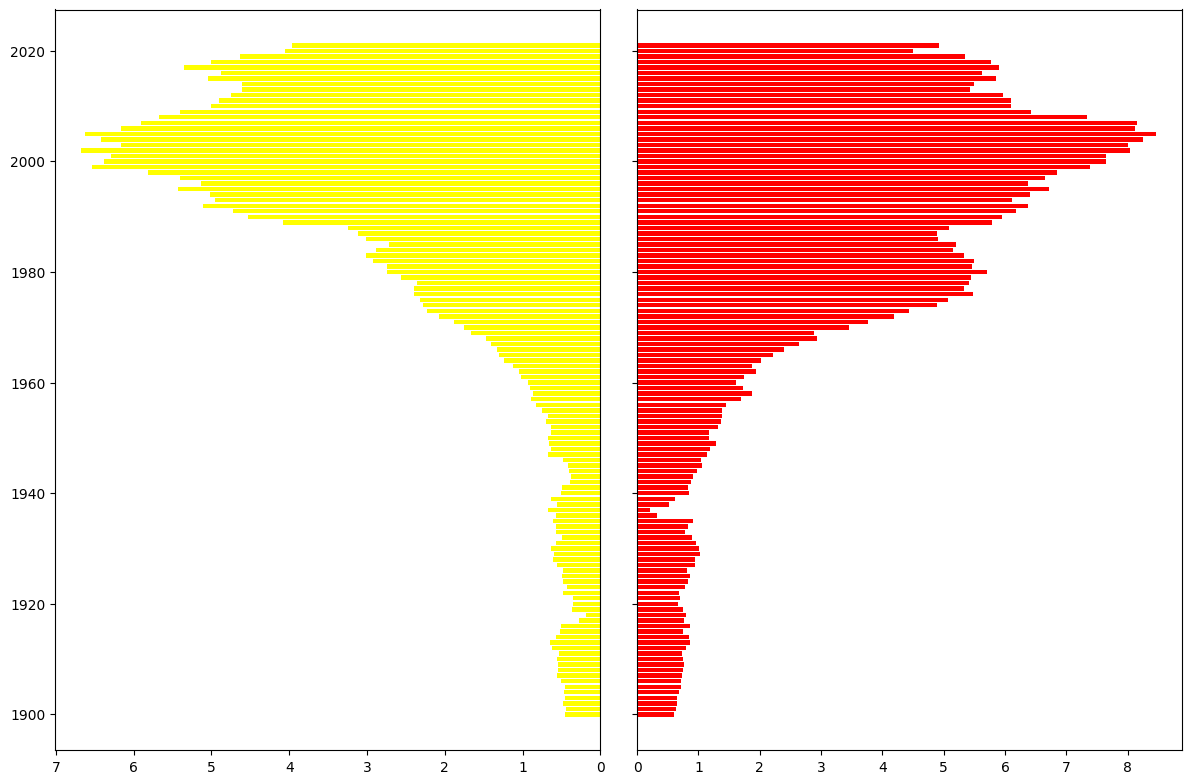

In [40]:
bar_fig, bar_axes = plt.subplots(figsize=(12, 8), ncols=2, sharey=True)
bar_fig.tight_layout()
# Configuraçao do ``Axes``.
# bar_axes.set_title("Emissões de CO2 per capita entre 1900 e 2021")
# bar_axes.set_xlabel("Ano")
# bar_axes.set_ylabel(r"Emissão CO$_2$ per capita (toneladas)")
# bar_axes.grid(True)

# Inicializar bottom_series com uma Serie de zeros.
bottom_series = [0]*122
areas = []


# Construir as barras PT
barras_pt = bar_axes[0].barh(
    datas,  # Seria a utilizar para o eixo dos XX.
    dados_pt,
    color="yellow",  # Cor da "linha".
    label="Portugal",  # O valor "humano" das etiquetas. 
)
# Construir as barras PT
barras_es = bar_axes[1].barh(
    datas,  # Seria a utilizar para o eixo dos XX.
    dados_es,
    color="red",  # Cor da "linha".
    label="Espanha",  # O valor "humano" das etiquetas.
)
# bar_axes[0].invert_yxis() 
bar_axes[0].invert_xaxis()
# bar_axes[1].invert_xaxis()




# bar_axes.legend(loc="upper left")
